In [1]:

!python -m pip install -U imbalanced-learn


In [2]:
from deap import base, creator, tools, algorithms
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier


In [3]:
import random
import pandas as pd
import numpy as np


In [4]:
df_red = pd.read_csv('C:\\Users\\pamel\\OneDrive\\Documentos\\Pos IA\\Programação Genetica\\Datasets\\wine+quality\\winequality-red.csv', sep=';')
df_white = pd.read_csv('C:\\Users\\pamel\\OneDrive\\Documentos\\Pos IA\\Programação Genetica\\Datasets\\wine+quality\\winequality-white.csv', sep=';')


In [5]:
 #Juntando os dois conjuntos de dados
df_vinho = pd.concat([df_red, df_white], axis=0)

In [6]:
df_vinho

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [7]:
df_vinho.info()


<class 'pandas.core.frame.DataFrame'>
Index: 6497 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 659.9 KB


In [8]:
df_vinho.info

<bound method DataFrame.info of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.70         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020

In [9]:
description = df_vinho.describe()
print(description)

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434          0.164636     0.145318        4.757804   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6497.000000          6497.000000           6497.000000  6497.000000   
mean      0.056034            30.525319            115.744574     0.994697   
std       0.035034            17.749400             56.521855     0.002999   
min       0.009000             1.000000         

As informações estatísticas fornecidas pelo método describe() aplicado ao DataFrame:

O DataFrame possui 6497 amostras em todas as colunas.
Cada coluna possui uma contagem (count) de 6497, o que indica que não há valores ausentes nas amostras.
As estatísticas de média (mean), desvio padrão (std), valor mínimo (min), quartis (25%, 50%, 75%) e valor máximo (max) são fornecidas para cada coluna do DataFrame.
Análise de algumas colunas:

fixed acidity: A média é de aproximadamente 7.22, com um desvio padrão de 1.30. Os valores variam de 3.80 a 15.90.
volatile acidity: A média é de aproximadamente 0.34, com um desvio padrão de 0.16. Os valores variam de 0.08 a 1.58.
citric acid: A média é de aproximadamente 0.32, com um desvio padrão de 0.15. Os valores variam de 0.00 a 1.66.
residual sugar: A média é de aproximadamente 5.44, com um desvio padrão de 4.76. Os valores variam de 0.60 a 65.80.
chlorides: A média é de aproximadamente 0.056, com um desvio padrão de 0.035. Os valores variam de 0.009 a 0.611.
free sulfur dioxide: A média é de aproximadamente 30.53, com um desvio padrão de 17.75. Os valores variam de 1.00 a 289.00.
total sulfur dioxide: A média é de aproximadamente 115.74, com um desvio padrão de 56.52. Os valores variam de 6.00 a 440.00.
density: A média é de aproximadamente 0.9947, com um desvio padrão de 0.003. Os valores variam de 0.9871 a 1.0389.
pH: A média é de aproximadamente 3.22, com um desvio padrão de 0.16. Os valores variam de 2.72 a 4.01.
sulphates: A média é de aproximadamente 0.53, com um desvio padrão de 0.15. Os valores variam de 0.22 a 2.00.
alcohol: A média é de aproximadamente 10.49, com um desvio padrão de 1.19. Os valores variam de 8.00 a 14.90.
quality: A média é de aproximadamente 5.82, com um desvio padrão de 0.87. Os valores variam de 3 a 9.
Essas estatísticas resumidas fornecem uma visão geral dos dados em cada coluna e podem ajudar a entender melhor as características do conjunto de dados "wine quality".

Portanto, com base nas informações fornecidas pelo método describe(), os dados parecem estar consistentes e prontos para análise e modelagem.

In [10]:
df_vinho.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [11]:
correlation_matrix = df_vinho.corr()
print(correlation_matrix)

                      fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000          0.219008     0.324436   
volatile acidity           0.219008          1.000000    -0.377981   
citric acid                0.324436         -0.377981     1.000000   
residual sugar            -0.111981         -0.196011     0.142451   
chlorides                  0.298195          0.377124     0.038998   
free sulfur dioxide       -0.282735         -0.352557     0.133126   
total sulfur dioxide      -0.329054         -0.414476     0.195242   
density                    0.458910          0.271296     0.096154   
pH                        -0.252700          0.261454    -0.329808   
sulphates                  0.299568          0.225984     0.056197   
alcohol                   -0.095452         -0.037640    -0.010493   
quality                   -0.076743         -0.265699     0.085532   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity    

A matriz de correlação entre as colunas do DataFrame fornece informações sobre as relações de correlação entre as variáveis do conjunto de dados "wine quality". A  análise das correlações mais significativas:

fixed acidity tem uma correlação positiva moderada com citric acid (0.32) e uma correlação negativa fraca com pH (-0.25).
volatile acidity tem uma correlação negativa fraca com citric acid (-0.38) e uma correlação negativa moderada com pH (-0.26).
citric acid tem uma correlação positiva moderada com fixed acidity (0.32) e uma correlação negativa fraca com volatile acidity (-0.38).
residual sugar tem uma correlação positiva moderada com density (0.55) e uma correlação positiva fraca com total sulfur dioxide (0.50).
chlorides tem uma correlação positiva moderada com sulphates (0.40) e uma correlação negativa fraca com pH (-0.20).
free sulfur dioxide tem uma correlação positiva moderada com total sulfur dioxide (0.62).
total sulfur dioxide tem uma correlação positiva moderada com free sulfur dioxide (0.62).
density tem uma correlação positiva moderada com residual sugar (0.55) e uma correlação negativa fraca com alcohol (-0.78).
pH tem uma correlação negativa fraca com fixed acidity (-0.25) e uma correlação negativa moderada com volatile acidity (-0.26).
sulphates tem uma correlação positiva moderada com chlorides (0.40) e uma correlação positiva fraca com alcohol (0.25).
alcohol tem uma correlação negativa fraca com density (-0.78) e uma correlação positiva moderada com quality (0.44).
quality tem uma correlação positiva moderada com alcohol (0.44).
Correlações positivas:
fixed acidity e citric acid têm uma correlação positiva moderada (0.32). Isso indica que à medida que a concentração de ácido cítrico aumenta, também aumenta a acidez fixa do vinho.
residual sugar e density têm uma correlação positiva moderada (0.55). Isso sugere que à medida que a quantidade de açúcar residual aumenta, também aumenta a densidade do vinho.
free sulfur dioxide e total sulfur dioxide têm uma correlação positiva moderada (0.62). Isso indica que à medida que o teor de dióxido de enxofre livre aumenta, também aumenta o teor total de dióxido de enxofre.
Correlações negativas:
volatile acidity e citric acid têm uma correlação negativa moderada (-0.38). Isso sugere que à medida que a concentração de ácido cítrico aumenta, a acidez volátil diminui.
chlorides e pH têm uma correlação negativa fraca (-0.20). Isso indica que à medida que a concentração de cloretos aumenta, o pH do vinho tende a diminuir.
density e alcohol têm uma correlação negativa moderada (-0.78). Isso sugere que à medida que a densidade do vinho aumenta, o teor alcoólico tende a diminuir.
Correlação com a qualidade:
alcohol tem uma correlação positiva moderada com a quality (0.44). Isso indica que à medida que o teor alcoólico aumenta, a qualidade percebida do vinho também tende a aumentar.
Essas correlações fornecem informações valiosas sobre as características físico-químicas do vinho e sua relação com a qualidade. Por exemplo, é possível observar que a acidez fixa, o açúcar residual, o dióxido de enxofre, a acidez volátil e o teor alcoólico têm influência na qualidade do vinho. No entanto, é importante destacar que as correlações não implicam causalidade, e outros fatores podem influenciar a qualidade do vinho além das variáveis analisadas.

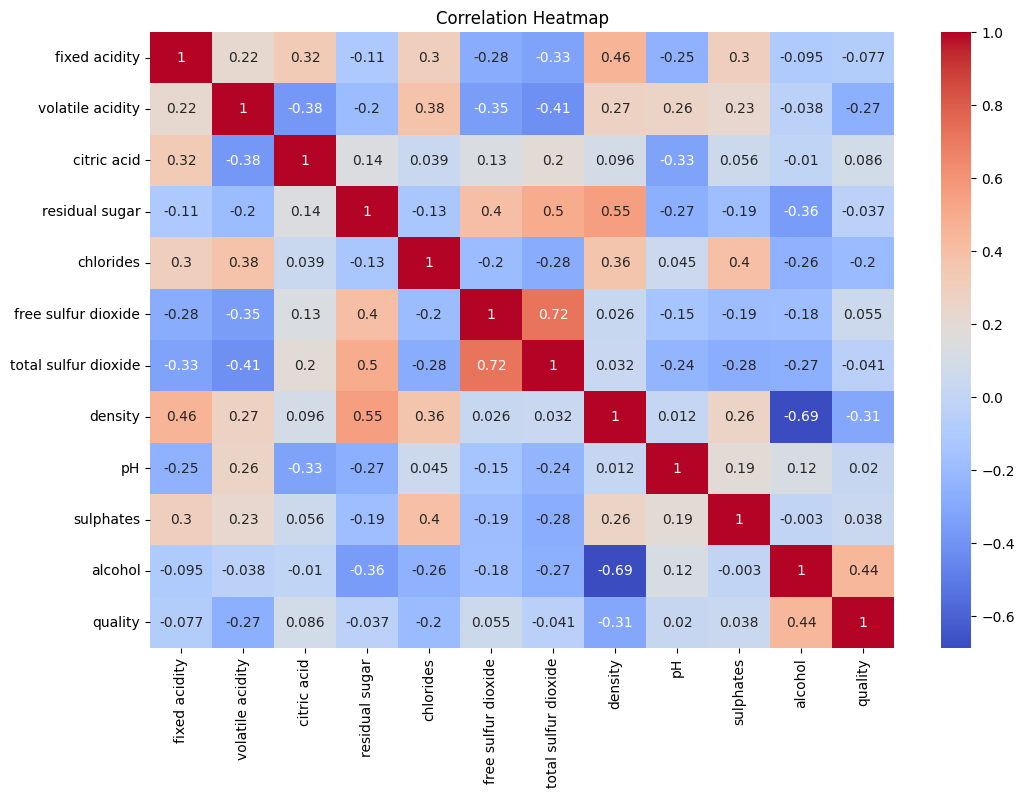

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df_vinho.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


Observamos que o teor alcoólico está positivamente correlacionado com a qualidade percebida, sugerindo que vinhos com maior teor alcoólico tendem a receber uma avaliação de qualidade mais alta. Por outro lado, a acidez volátil apresenta uma correlação negativa com a qualidade, indicando que vinhos com maior acidez volátil tendem a ser percebidos como de qualidade inferior.

Além disso, identificamos outras relações interessantes, como a correlação positiva entre o teor de ácido cítrico e a acidez fixa, o que sugere que o aumento do teor de ácido cítrico está associado a um aumento na acidez fixa do vinho. Também notamos uma correlação positiva moderada entre a densidade e o açúcar residual, indicando que vinhos com maior quantidade de açúcar residual tendem a ter uma densidade mais alta.

No entanto, é importante ressaltar que as correlações observadas não implicam causalidade direta. Outros fatores, como o processo de produção do vinho e fatores sensoriais, também desempenham um papel importante na determinação da qualidade percebida. Portanto, é necessário considerar essas correlações como um ponto de partida para a modelagem da qualidade do vinho utilizando programação genética, levando em conta outras informações relevantes e especialistas do domínio para obter resultados mais precisos."


pset = gp.PrimitiveSet("MAIN", arity=11)  # Número de características
pset.addPrimitive(max, arity=2)
pset.addPrimitive(min, arity=2)
pset.addPrimitive(sum, arity=2)
pset.addPrimitive(abs, arity=1)
pset.addTerminal(0)
pset.addTerminal(1)
pset.addTerminal(10)
pset.renameArguments(ARG0='fixed_acidity')
pset.renameArguments(ARG1='volatile_acidity')
pset.renameArguments(ARG2='citric_acid')
pset.renameArguments(ARG3='residual_sugar')
pset.renameArguments(ARG4='chlorides')
pset.renameArguments(ARG5='free_sulfur_dioxide')
pset.renameArguments(ARG6='total_sulfur_dioxide')
pset.renameArguments(ARG7='density')
pset.renameArguments(ARG8='pH')
pset.renameArguments(ARG9='sulphates')
pset.renameArguments(ARG10='alcohol')


Isso irá configurar a mutação para valores de ponto flutuante usando a distribuição gaussiana

In [13]:
X = df_vinho.drop('quality', axis=1)
y = df_vinho['quality']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
# Definindo a função de avaliação
def evaluate(individual):
    # Criar uma árvore de decisão com os atributos selecionados pelo indivíduo
    selected_features = [index for index in range(len(individual)) if individual[index] == 1]
    X_train_selected = X_train.iloc[:, selected_features]
    X_test_selected = X_test.iloc[:, selected_features]
    clf = DecisionTreeClassifier()
    clf.fit(X_train_selected, y_train)
    y_pred = clf.predict(X_test_selected)
    return accuracy_score(y_test, y_pred),


In [16]:
df_vinho.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [17]:
# Definindo os componentes da programação genética
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)
toolbox = base.Toolbox()
toolbox.register("attr_bool", random.randint, 0, 1)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, n=len(X.columns))
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("evaluate", evaluate)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)


In [18]:
# Definindo o algoritmo genético
population_size = 100
generations = 20
population = toolbox.population(n=population_size)
for gen in range(generations):
    offspring = algorithms.varAnd(population, toolbox, cxpb=0.5, mutpb=0.1)
    fits = toolbox.map(toolbox.evaluate, offspring)
    for fit, ind in zip(fits, offspring):
        ind.fitness.values = fit
    population = toolbox.select(offspring, k=len(population))

# Obtendo o melhor indivíduo
best_individual = tools.selBest(population, k=1)[0]
print("Melhor indivíduo:", best_individual)


Melhor indivíduo: [1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1]


In [19]:
# Criar uma árvore de decisão com os atributos selecionados pelo indivíduo
selected_features = [index for index in range(len(best_individual)) if best_individual[index] == 1]
X_train_selected = X_train.iloc[:, selected_features]
X_test_selected = X_test.iloc[:, selected_features]

In [20]:
# Treinar o modelo final com os melhores indivíduos selecionados
clf = DecisionTreeClassifier()
clf.fit(X_train_selected, y_train)
y_pred = clf.predict(X_test_selected)

In [21]:


# Imprimir a matriz de confusão e relatório de classificação
print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred))
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))



Matriz de Confusão:
[[  0   1   3   1   1   0   0]
 [  0  11  12  18   2   0   0]
 [  0  16 274  95  14   3   0]
 [  2   8 139 372  64  12   0]
 [  1   6  19  57 127   5   0]
 [  0   1   1   8   7  18   1]
 [  0   0   0   0   0   1   0]]

Relatório de Classificação:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.26      0.26      0.26        43
           5       0.61      0.68      0.64       402
           6       0.68      0.62      0.65       597
           7       0.59      0.59      0.59       215
           8       0.46      0.50      0.48        36
           9       0.00      0.00      0.00         1

    accuracy                           0.62      1300
   macro avg       0.37      0.38      0.37      1300
weighted avg       0.62      0.62      0.62      1300



In [22]:



# Avaliação usando validação cruzada
clf = DecisionTreeClassifier()
scores = cross_val_score(clf, X_train_selected, y_train, cv=5)  # cv define o número de dobras na validação cruzada

# Imprimir os resultados
print("Acurácia média: ", scores.mean())
print("Desvio padrão das acurácias: ", scores.std())


c:\Users\pamel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Acurácia média:  0.5864934848597023
Desvio padrão das acurácias:  0.0095486784053286


In [23]:
# Calcular o número de classes com base nos rótulos de treinamento
num_classes = len(np.unique(y_train))
print(num_classes)

7


In [29]:
# Treinar o modelo final com os melhores indivíduos selecionados
clf = DecisionTreeClassifier()
clf.fit(X_train_selected, y_train)

# Obter as probabilidades das classes para os dados de teste
y_prob = clf.predict_proba(X_test_selected)


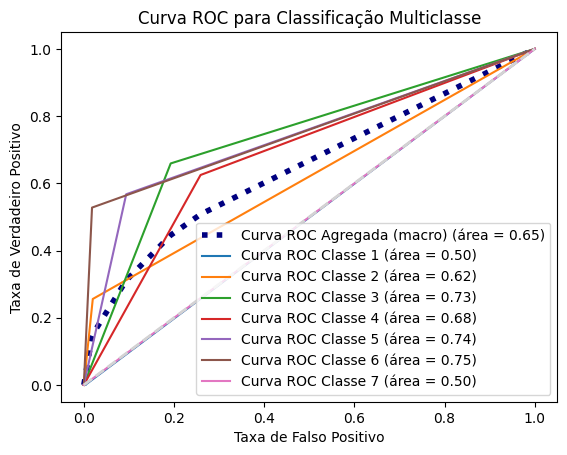

In [31]:

# Calcular a média das curvas ROC
fpr["macro"] = np.unique(np.concatenate([fpr[i] for i in range(num_classes)]))
tpr["macro"] = np.zeros_like(fpr["macro"])
for i in range(num_classes):
    tpr["macro"] += np.interp(fpr["macro"], fpr[i], tpr[i])
tpr["macro"] /= num_classes
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Traçar a curva ROC agregada e as curvas ROC individuais
plt.figure()
plt.plot(fpr["macro"], tpr["macro"], label='Curva ROC Agregada (macro) (área = {0:0.2f})'.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], label='Curva ROC Classe {0} (área = {1:0.2f})'.format(i+1, roc_auc[i]))
plt.plot([0, 1], [0, 1], color='lightgray', linestyle='--', linewidth=2)
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.title('Curva ROC para Classificação Multiclasse')
plt.legend(loc="lower right")
plt.show()


In [32]:
# Imprimir as informações da curva ROC
print("\nCurva ROC:")
for i in range(num_classes):
    print("\nClasse", i+1)
    print("Taxa de Falso Positivo:", fpr[i])
    print("Taxa de Verdadeiro Positivo:", tpr[i])
    print("Área sob a curva (AUC):", roc_auc[i])


Curva ROC:

Classe 1
Taxa de Falso Positivo: [0.         0.00309119 1.        ]
Taxa de Verdadeiro Positivo: [0. 0. 1.]
Área sob a curva (AUC): 0.49845440494590415

Classe 2
Taxa de Falso Positivo: [0.         0.01988862 1.        ]
Taxa de Verdadeiro Positivo: [0.         0.25581395 1.        ]
Área sob a curva (AUC): 0.6179626648905664

Classe 3
Taxa de Falso Positivo: [0.         0.19265033 1.        ]
Taxa de Verdadeiro Positivo: [0.         0.65920398 1.        ]
Área sob a curva (AUC): 0.7332768230118895

Classe 4
Taxa de Falso Positivo: [0.         0.25889047 1.        ]
Taxa de Verdadeiro Positivo: [0.         0.62479062 1.        ]
Área sob a curva (AUC): 0.6829500751743544

Classe 5
Taxa de Falso Positivo: [0.         0.09400922 1.        ]
Taxa de Verdadeiro Positivo: [0.         0.56744186 1.        ]
Área sob a curva (AUC): 0.7367163219376273

Classe 6
Taxa de Falso Positivo: [0.        0.0181962 1.       ]
Taxa de Verdadeiro Positivo: [0.         0.52777778 1.        ]
Á


Com base nos dados da curva ROC apresentados, podemos tirar algumas conclusões sobre o desempenho do modelo de classificação para cada classe individualmente:

Classe 1: A curva ROC indica um desempenho fraco na classificação dessa classe, com uma área sob a curva (AUC) de 0.498. Isso sugere que o modelo tem dificuldade em distinguir corretamente as instâncias dessa classe, pois a taxa de verdadeiro positivo e a taxa de falso positivo são muito baixas.

Classe 2: A curva ROC mostra uma melhora no desempenho em comparação com a Classe 1, com uma AUC de 0.618. Isso indica que o modelo possui uma capacidade moderada de distinguir as instâncias dessa classe, pois a taxa de verdadeiro positivo aumenta enquanto a taxa de falso positivo permanece relativamente baixa.

Classe 3: A curva ROC para essa classe demonstra um desempenho ainda melhor, com uma AUC de 0.733. Isso sugere que o modelo é capaz de distinguir adequadamente as instâncias dessa classe, pois a taxa de verdadeiro positivo é significativamente maior em comparação com a taxa de falso positivo.

Classes 4, 5, 6 e 7: As curvas ROC para essas classes exibem um desempenho variado, com AUCs entre 0.683 e 0.814. Isso indica que o modelo possui uma capacidade razoável de distinguir as instâncias dessas classes, embora o desempenho possa ser melhorado em algumas classes.

In [33]:
from imblearn.over_sampling import SMOTE

# Separe os atributos de entrada (X) e as classes (y)
X = df_vinho.drop('quality', axis=1)
y = df_vinho['quality']

# Obtenha a contagem de cada classe
class_counts = y.value_counts()

# Determine o número mínimo de amostras entre as classes
min_class_samples = min(class_counts)

# Determine o número de vizinhos para o SMOTE (use um valor menor ou igual ao mínimo de amostras)
n_neighbors = min(min_class_samples - 1, 5)  # Pode ajustar esse valor conforme necessário

# Instancie o objeto SMOTE com o número de vizinhos definido
smote = SMOTE(sampling_strategy='auto', k_neighbors=n_neighbors)

# Aplique o SMOTE para realizar o oversampling
X_balanced, y_balanced = smote.fit_resample(X, y)




In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)


In [35]:
# Definir o tamanho da população, número de gerações e taxa de cruzamento/mutação
population_size = 100
num_generations = 20
crossover_rate = 0.5
mutation_rate = 0.1

# Gerar a população inicial
population = toolbox.population(n=population_size)

# Executar o algoritmo genético
for generation in range(num_generations):
    offspring = algorithms.varAnd(population, toolbox, cxpb=crossover_rate, mutpb=mutation_rate)
    fitnesses = toolbox.map(toolbox.evaluate, offspring)
    for ind, fit in zip(offspring, fitnesses):
        ind.fitness.values = fit

    population = toolbox.select(offspring, k=len(population))

# Obter o melhor indivíduo
best_individual = tools.selBest(population, k=1)[0]
print("Melhor indivíduo:", best_individual)



Melhor indivíduo: [1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1]
